In [1]:
# This script reads in a lookup table that has the volume (several different metrics) of each 
# Forest Class ID (FCID) in the GNN dataset saved by species and 1" diameter classes

In [2]:
# load the packages
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import math
from ARBCARVolumeEquations import *

In [3]:
workdir = 'C:\Users\ddiaz\Desktop'
CSV = 'GNN_TREE_LIVE_vols_ac.csv'
gnn_tree_live_vols_ac = pd.read_csv(workdir+'\\'+CSV, sep = ',', quotechar = '"', index_col = 'FCID')
print(str(len(gnn_tree_live_vols_ac)) + " live trees loaded.")
print(str(len(pd.unique(gnn_tree_live_vols_ac.index))) + " FCIDs loaded.")

2651138 live trees loaded.
53704 FCIDs loaded.


In [16]:
def getproducts(species_list, minDBH, maxDBH, region, volume_metric):
    """returns a dataframe with the volume of wood per acre in each GNN FCID within the species and diameter range provided
    species_list: a list of SPP_SYMBOLS (NRCS PLANTS Symbols)
    minDBH: minimum diameter threshold (in inches) for forest product type
    maxDBH: maximum diameter threshold (in inches) for forest product type
    region: 'EOR', 'WOR', 'EWA', 'WWA', or 'CA'
    volume_metric: 'CVT', 'CVTS', 'CV4', 'CV_sawlog', or 'BF'.
    """
    # check to confirm metric and region are appropriate
    if region not in ['WOR', 'EOR', 'WWA', 'EWA', 'CA']:
        raise TypeError("region must be 'WOR', 'EOR', 'WWA', 'EWA', or 'CA'.")
    if volume_metric not in ['CVTS', 'CVT', 'CV4', 'CV_sawlog', 'BF', 'AG_bio', 'CV4_bio']:
        raise TypeError("volume_metric must be 'CVTS', 'CVT', 'CV4', 'CV_sawlog', or 'BF'.")
    
    if volume_metric in ['CVTS', 'CVT', 'CV4', 'CV_sawlog']:
        search_metric = region + "_" + volume_metric + "_ft3_ac"
    elif volume_metric == 'BF':
        search_metric = region + "_" + volume_metric + "_ac"
    elif volume_metric in ['AG_bio', 'CV4_bio']:
        search_metric = volume_metric + "_tons_ac"
     
    return pd.DataFrame(gnn_tree_live_vols_ac[['SPP_SYMBOL', 'DBH_CM', search_metric]].where((gnn_tree_live_vols_ac['SPP_SYMBOL'].isin(species_list)) & (gnn_tree_live_vols_ac['DBH_CM']/2.54 >= minDBH) & (gnn_tree_live_vols_ac['DBH_CM']/2.54 < maxDBH))[search_metric].groupby(level=0).sum().fillna(0))

In [25]:
# find all species symbols that have juniper in the common name
juniperlist = []
for symbol in VolumeEq_Dict.keys():
    if 'juniper' in (VolumeEq_Dict[symbol]['common_name']):
        juniperlist.append(symbol)
juniperlist

['JUGR7', 'JUOC', 'JUOS', 'JUCA7', 'JUSC2']

In [17]:
EOR_symbols = []
EOR_commons = []
search_spp = ['pine', 'fir', 'spruce']
for symbol in VolumeEq_Dict.keys():
    try:
        EOR_symbols.append([symbol for spp in search_spp if spp in VolumeEq_Dict[symbol]['common_name']][0])
    except IndexError:
        pass
for symb in EOR_symbols:
    EOR_commons.append(VolumeEq_Dict[symb]['common_name'])
print(EOR_symbols)
print(EOR_commons)

['PIAT', 'PICOL', 'PICOM', 'PICO', 'PIMO3', 'PICO3', 'PIPOS', 'PIAR', 'ABMA', 'PIAL', 'PIJE', 'PISI', 'PIENM2', 'ABCO', 'ABLAL', 'PIPOP', 'ABAM', 'ABGRC', 'PIPOW2', 'PISY', 'PIWA', 'ABGR', 'PIEN', 'PIRA2', 'PIPOB2', 'PIPOB3', 'PILA', 'ABMAM', 'ABMAS', 'ABPR', 'PIRA', 'PISA2', 'PIBR', 'PIBA', 'PIBAB', 'PIBAA', 'ABPRSH', 'PIPO', 'PIFL2', 'ABLO', 'ABLA', 'PIENE', 'PIMU', 'LALY', 'ABBR', 'PSMA', 'PSME']
['Knobcone pine', 'Lodgepole pine', 'Sierra lodgepole pine', 'Lodgepole pine', 'Western white pine', 'Coulter pine', 'Ponderosa pine', 'Bristlecone pine', 'Red fir', 'Whitebark pine', 'Jeffrey pine', 'Sitka spruce', 'Engelmann spruce', 'White fir', 'Subalpine fir', 'Ponderosa pine', 'Pacific silver fir', 'White and Grand fir', 'Washoe pine', 'Scots pine', 'Washoe pine', 'Grand fir', 'Engelmann spruce', 'Monterey pine', 'Ponderosa pine', 'Ponderosa pine', 'Sugar pine', 'California red fir', 'Shasta red fir', 'Noble fir', 'Monterey pine', 'Gray pine', 'Brewer spruce', 'Foxtail pine', 'Foxtail

In [18]:
EOR_commercials = ['Lodgepole pine', 'Western white pine', 'Ponderosa pine', 'Red fir', 'Jeffrey pine', 'Engelmann spruce', 'White fir', 'Subalpine fir', 'Pacific silver fir', 'White and Grand fir', 'Washoe pine', 'Grand fir', 'Engelmann spruce', 'Ponderosa pine', 'Sugar pine', 'California red fir', 'Shasta red fir', 'Noble fir', 'Noble and Red firs', 'Ponderosa pine', 'Engelmann spruce', 'Subalpine larch', 'Douglas-fir']
EOR_commercial_commons = []
EOR_commercial_symbols = []
for item in EOR_commercials:
    if item not in EOR_commercial_commons:
        EOR_commercial_commons.append(item)
for symbol in VolumeEq_Dict.keys():
    if VolumeEq_Dict[symbol]['common_name'] in EOR_commercial_commons:
        EOR_commercial_symbols.append(symbol)

print(EOR_commercial_commons)
print(EOR_commercial_symbols)

['Lodgepole pine', 'Western white pine', 'Ponderosa pine', 'Red fir', 'Jeffrey pine', 'Engelmann spruce', 'White fir', 'Subalpine fir', 'Pacific silver fir', 'White and Grand fir', 'Washoe pine', 'Grand fir', 'Sugar pine', 'California red fir', 'Shasta red fir', 'Noble fir', 'Noble and Red firs', 'Subalpine larch', 'Douglas-fir']
['PICOL', 'PICO', 'PIMO3', 'PIPOS', 'ABMA', 'PIJE', 'PIENM2', 'ABCO', 'ABLAL', 'PIPOP', 'ABAM', 'ABGRC', 'PIPOW2', 'PIWA', 'ABGR', 'PIEN', 'PIPOB2', 'PIPOB3', 'PILA', 'ABMAM', 'ABMAS', 'ABPR', 'ABPRSH', 'PIPO', 'ABLA', 'PIENE', 'LALY', 'PSME']


In [38]:
oaks_symbols = []
oaks_commons = []
df_symbols = []
ra_symbols = []
lp_symbols = []
pp_symbols = []
bm_symbols = []
madrone_symbols = []
for spp_sym in VolumeEq_Dict.keys():
    if ' oak' in VolumeEq_Dict[spp_sym]['common_name'].lower():
        oaks_symbols.append(spp_sym)
        oaks_commons.append(VolumeEq_Dict[spp_sym]['common_name'])
    if 'douglas-fir' in VolumeEq_Dict[spp_sym]['common_name'].lower():
        df_symbols.append(spp_sym)
    if 'red alder' in VolumeEq_Dict[spp_sym]['common_name'].lower():
        ra_symbols.append(spp_sym)
    if 'lodgepole pine' in VolumeEq_Dict[spp_sym]['common_name'].lower():
        lp_symbols.append(spp_sym)
    if 'ponderosa pine' in VolumeEq_Dict[spp_sym]['common_name'].lower():
        pp_symbols.append(spp_sym)
    if 'madrone' in VolumeEq_Dict[spp_sym]['common_name'].lower():
        madrone_symbols.append(spp_sym)
    if 'bigleaf maple' in VolumeEq_Dict[spp_sym]['common_name'].lower():
        bm_symbols.append(spp_sym)
    if 'ash' in VolumeEq_Dict[spp_sym]['common_name'].lower():
        lp_symbols.append(spp_sym)
        
firewood_symbols = df_symbols + ra_symbols + lp_symbols + pp_symbols + bm_symbols + madrone_symbols + oaks_symbols
firewood_SW_symbols = df_symbols + lp_symbols + pp_symbols + madrone_symbols
firewood_HW_symbols = ra_symbols + bm_symbols + madrone_symbols + oaks_symbols
firewood_commons = []
for symbol in firewood_symbols:
    firewood_commons.append(VolumeEq_Dict[symbol]['common_name'])
print(firewood_commons)    

['Bigcone Douglas-fir', 'Douglas-fir', 'Red alder', 'Lodgepole pine', 'Sierra lodgepole pine', 'Lodgepole pine', 'Oregon ash', 'Ash', 'Washoe pine', 'Washoe pine', 'Ponderosa pine', 'Ponderosa pine', 'Ponderosa pine', 'Ponderosa pine', 'Ponderosa pine', 'Bigleaf maple', 'Pacific madrone', 'Engelmann oak', 'California black oak', 'Canyon live oak', 'Canyon live oak', 'Blue oak', 'Emory oak', 'California live oak', 'Chinkapin oak', 'Canyon live oak', 'Interior live oak', 'Interior live oak', 'Interior live oak', 'Oregon white oak', 'Oregon white oak', 'Oregon white oak', 'California live oak', 'Oregon white oak', 'California white (valley) oak']


In [39]:
EOR_firewood_tons_SW = getproducts(species_list = firewood_SW_symbols, minDBH = 5, maxDBH = 9, region = 'EOR', volume_metric = 'CV4_bio')
EOR_firewood_tons_HW = getproducts(species_list = firewood_HW_symbols, minDBH = 5, maxDBH = 11, region = 'EOR', volume_metric = 'CV4_bio')
EOR_firewood_tons = EOR_firewood_tons_SW + EOR_firewood_tons_HW
print('Done.')

Done.


In [29]:
EOR_pine_firs_tons = getproducts(species_list = EOR_commercial_symbols, minDBH = 5, maxDBH = 9, region = 'EOR', volume_metric = 'CV4_bio')
print('Done.')

Done.


In [26]:
juniper_CV4_biomass = getproducts(species_list = juniperlist, minDBH = 0, maxDBH = 999, region = 'EOR', volume_metric = 'CV4_bio')
print('Done.')

Done.


In [40]:
EOR_firewood_tons.to_csv('C:\Users\ddiaz\Desktop\EOR_firewood_tons_ac.csv')
print('Done.')

Done.


In [30]:
EOR_pine_firs_tons.to_csv('C:\Users\ddiaz\Desktop\EOR_pine_firs_tons_ac.csv')
print('Done.')

Done.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000318F8278>]], dtype=object)

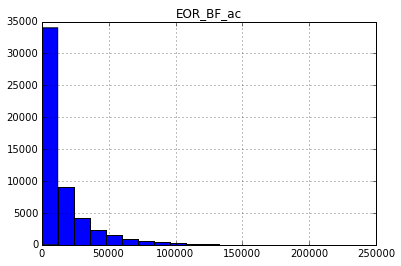

In [21]:
EOR_pine_firs_BF.hist(bins = 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000007D70D1D0>]], dtype=object)

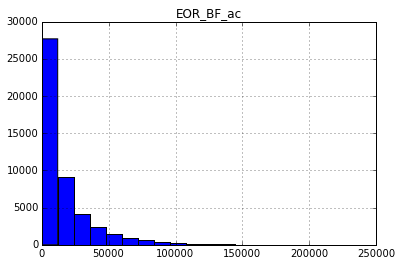

In [24]:
EOR_pine_firs_BF.loc[EOR_pine_firs_BF.EOR_BF_ac >0].hist(bins=20)